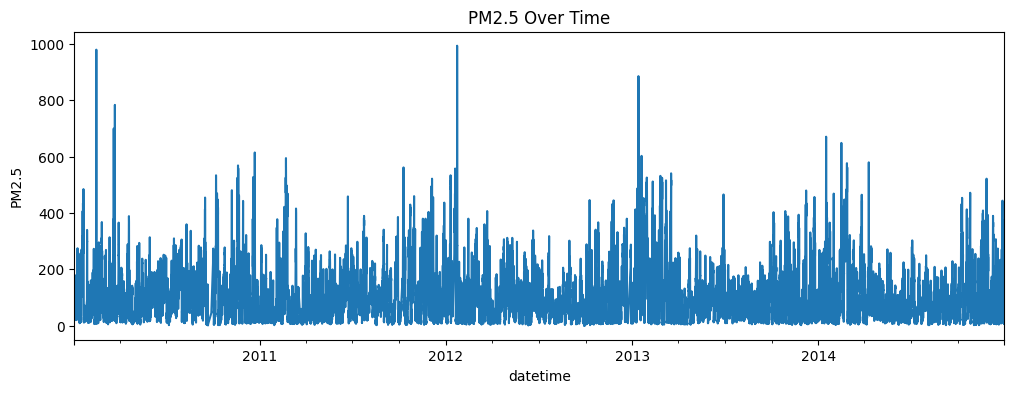

ADF Statistic: -21.338838
p-value: 0.000000
Series is stationary.


c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\cw\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                35040
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -160539.135
Date:                Sat, 24 May 2025   AIC                         321090.269
Time:                        09:43:45   BIC                         321141.054
Sample:                    01-02-2010   HQIC                        321106.445
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1946      0.001    131.506      0.000       0.192       0.197
ar.L2         -0.0484      0.001    -42.102      0.000      -0.051      -0.046
ar.L3         -0.0331      0.002    -20.908      0.0

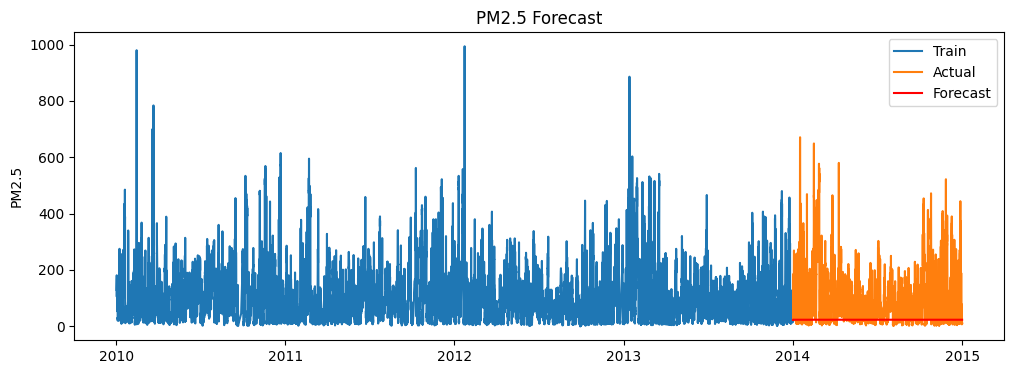

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load data
df = pd.read_csv('../data/PRSA_data_2010.1.1-2014.12.31.csv')

# Create datetime index
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Interpolate missing pm2.5 values
df['pm2.5'] = df['pm2.5'].interpolate()

# Drop remaining missing values (if any)
df.dropna(subset=['pm2.5'], inplace=True)

# Extract pm2.5 series
series = df['pm2.5']

# Plot PM2.5
series.plot(figsize=(12,4), title='PM2.5 Over Time')
plt.ylabel('PM2.5')
plt.show()

# Stationarity check
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] > 0.05:
    print("Series is likely non-stationary. Differencing or transformation needed.")
else:
    print("Series is stationary.")

# Train-test split (e.g., last 1 year as test)
train = series[:'2013-12-31']
test = series['2014-01-01':]

# Fit ARIMA model on train data
model = ARIMA(train, order=(5,1,0))  # you can tune (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

# Forecast for test period length
n_forecast = len(test)
forecast = model_fit.forecast(steps=n_forecast)

# Evaluation
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)
print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}')

# Plot actual vs forecast
plt.figure(figsize=(12,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('PM2.5 Forecast')
plt.ylabel('PM2.5')
plt.legend()
plt.show()
